<a href="https://colab.research.google.com/github/yihimin/mbti_test/blob/main/lhm_Chapter12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[lhm 12-1]

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,535 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

[lhm 12-2]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# 1. 일주일간의 놀이터 방문자수
dates = pd.date_range(start="2024-01-01", periods=7)
visitors = [30, 40, 35, 45, 50, 45, 55] # 방문자수가 점점 늘어나는 추세
print(dates)

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07'],
              dtype='datetime64[ns]', freq='D')


[lhm 12-3]

In [2]:
# 2. 데이터 준비
data = pd.DataFrame({"Date": dates, "Visitors": visitors})
data.set_index("Date", inplace=True)
data

,Visitors
Date,
2024-01-01,30
2024-01-02,40
2024-01-03,35
2024-01-04,45
2024-01-05,50
2024-01-06,45
2024-01-07,55


[lhm 12-4]

In [3]:
# 3. ARIMA 모델 만들기
# data["Visitors"]는 방문자수 데이터
# order=(1,1,1)은 예측을 위한 설정값
model = ARIMA(data["Visitors"], order=(1, 1, 1))
# 4. 모델 학습하기
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

[lhm 12-5]

In [4]:
# 5. 내일과 모레의 방문자수 예측하기
tomorrow = fitted_model.forecast(steps=2)
tomorrow

,predicted_mean
2024-01-08,49.706746
2024-01-09,52.876866


[lhm 12-6]

<ipython-input-8-e4081c1d14cd>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data.index[-1] + pd.Timedelta(days=1), tomorrow[0], label="예측 방문자수", marker='o', color='red')


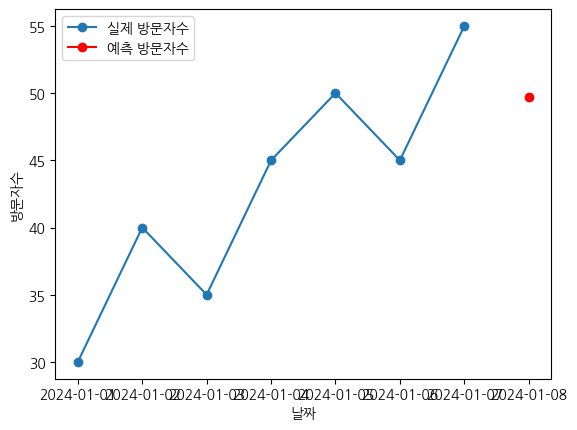

In [8]:
#6. 시각화
# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.plot(data.index, data["Visitors"], label="실제 방문자수", marker='o')
plt.plot(data.index[-1] + pd.Timedelta(days=1), tomorrow[0], label="예측 방문자수", marker='o', color='red')
plt.xlabel("날짜")
plt.ylabel("방문자수")
plt.legend()
plt.show()

[lhm 12-7]

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#1. 데이터준비
dates = pd.date_range(start="2024-11-01", periods=6)
stringN = [1,5,10,15,20,25] # 줄넘기 수
data = pd.DataFrame({"Date": dates, "stringN": stringN})
data1 = data.set_index("Date", inplace=False)
data1

,stringN
Date,
2024-11-01,1
2024-11-02,5
2024-11-03,10
2024-11-04,15
2024-11-05,20
2024-11-06,25


[lhm 12-8]

In [11]:
# 2. ARIMA 모델 만들기
# data1[" stringN "]는 줄넘기 수 데이터
# order=(1,1,1)은 예측을 위한 설정값

modelN = ARIMA(data1["stringN"], order=(1, 1, 1))

# 3. 모델 학습하기
fitted_modelN = modelN.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[lhm 12-9]

In [12]:
# 4. 내일과 모레의 줄넘기 수 예측하기
tomorrowN = fitted_modelN.forecast(steps=2)
print(dates[-1] + pd.Timedelta(days=2))
print("내일:", tomorrowN[0]) # 첫 번째 예측값
print("내일모레:", tomorrowN[1]) # 두 번째 예측값

2024-11-08 00:00:00
내일: 29.965491114548264
내일모레: 34.893092194059044


<ipython-input-12-89a9df6d5b23>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("내일:", tomorrowN[0]) # 첫 번째 예측값
<ipython-input-12-89a9df6d5b23>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("내일모레:", tomorrowN[1]) # 두 번째 예측값


[lhm 12-10]

<ipython-input-14-42e6601db8da>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data1.index[-1] + pd.Timedelta(days=1), tomorrowN[0], label="내일 줄넘기 수", marker='o', color='red')
<ipython-input-14-42e6601db8da>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data1.index[-1] + pd.Timedelta(days=2), tomorrowN[1], label="내일모레 줄넘기 수", marker='o', color='pink')


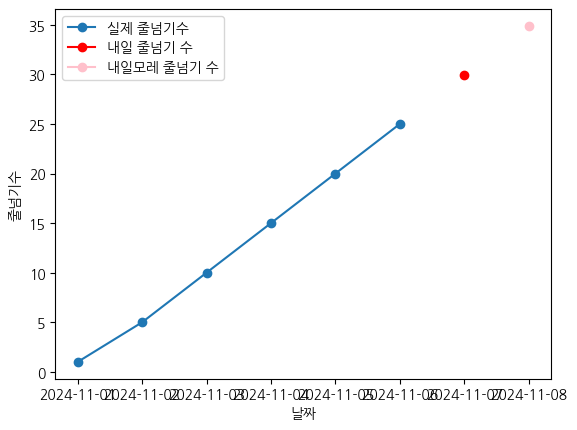

In [14]:
#5. 시각화
# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.plot(data1.index, data1["stringN"], label="실제 줄넘기수", marker='o')
plt.plot(data1.index[-1] + pd.Timedelta(days=1), tomorrowN[0], label="내일 줄넘기 수", marker='o', color='red')
plt.plot(data1.index[-1] + pd.Timedelta(days=2), tomorrowN[1], label="내일모레 줄넘기 수", marker='o', color='pink')
plt.xlabel("날짜")
plt.ylabel("줄넘기수")
plt.legend()
plt.show()